In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)

import galapagos_potato as bp

In [2]:
# Fetal health: 1 - Normal 2 - Suspect 3 - Pathological

In [3]:
df = pd.read_csv(r'C:\Users\Chulabutrach\Documents\Coding\Projects\pttgc\neural_network\data\FetalHealth\fetal_health.csv')
df['label'] = df['fetal_health'].apply(lambda x: 0 if x == 1 else 1)
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,label
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0,1
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0,0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0,0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0,0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0,0


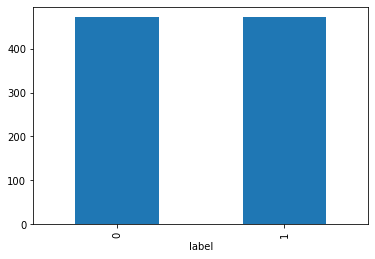

In [4]:
df_good = df.loc[df['label'] == 1]
df_bad = df.loc[df['label'] == 0]

df_bad = df_bad.sample(n=len(df_good), random_state=10)
df = df_good.append(df_bad).reset_index(drop=True)
df = df.sample(frac=1).reset_index(drop=True)
df = df.reset_index()
df.groupby('label').index.nunique().plot.bar()
df = df.drop(['index', 'fetal_health', 'histogram_tendency', 'histogram_number_of_zeroes', 'histogram_number_of_peaks', 'baseline value'], axis=1)
df_test = df.tail(100)
df = df.head(842)

In [5]:
df.shape

(842, 18)

In [6]:
x = df
y = x.pop('label').values.tolist()
x = x.values.tolist()

In [7]:
x[0]

[0.011000000000000001,
 0.001,
 0.006999999999999999,
 0.0,
 0.0,
 0.0,
 53.0,
 1.5,
 0.0,
 21.0,
 107.0,
 97.0,
 204.0,
 152.0,
 155.0,
 153.0,
 39.0]

In [8]:
n_inputs = len(x[0])
n_outputs = 2
network = bp.initialize_networks(n_inputs, 2, n_outputs, n_layers=1)
# print(network)
# print(x)
bp.train_network(network, x, y, 0.5, 100, n_outputs)

0.7278229978039485
0.5114330774264497
0.6554738829889879
0.7027837937120065
3.058137609812661e-08
0.10765427428125696
0.291353718857266
0.8335059253542757
2.0009138790300085e-09
0.0
0.7124171496422241
0.19283285527344407
1.287825179829838e-09
0.0
0.833270923281545
0.11393548732833547
5.713701878296007e-08
0.0
0.9010577948081074
0.06815065772110818
5.046789652851658e-10
0.0
0.9406956462899687
0.04101184505284561
2.3544641791772847e-09
0.0
0.0034458005154298643
0.9998813936548371
9.916845233881588e-09
0.0
1.0
0.0


ValueError: math domain error

In [9]:
network

[[{'weights': [1.3397584760391778e-05,
    8.472688089439454e-05,
    7.636037916879254e-05,
    2.550680031045884e-05,
    4.9543508709194096e-05,
    4.494910647887381e-05,
    -0.017563073602065882,
    2.9689781132710638e-05,
    -0.0195185321968439,
    -0.0003195157764392136,
    -0.0008877126952247978,
    -0.029127626397961872,
    -0.03006596430212337,
    -0.0297419313105395,
    -0.029477286032279837,
    -0.029884733718203004,
    -5.295246876537811e-06],
   'bias': 0.9450504501220173,
   'output': 9.916845233881588e-09,
   'delta': -1.1004020774276833e-05},
  {'weights': [-0.0005924458814555552,
    3.0589983033553538e-06,
    -0.0006800440411173574,
    5.414124727934966e-05,
    9.391491627785106e-05,
    3.812042376882124e-05,
    -7.28297624597467,
    -0.27299830725118784,
    -0.0023030459606909566,
    -1.9795177919052334,
    -11.831568436661133,
    -21.618627181977846,
    -33.45026568017746,
    -27.989531544124375,
    -27.761977870158905,
    -28.2170635529478

In [ ]:
x_test = df_test
y_test = x_test.pop('label').values.tolist()
x_test = x_test.values.tolist()

In [ ]:
accuracy = bp.accuracy_evaluation(network, x_test, y_test)
print(accuracy)


In [ ]:
print(bp.make_predictions_list(network, x_test))

In [ ]:
y_test

In [ ]:
# n_inputs = len(x[0])
# n_outputs = 2
# network = bp.initialize_networks(n_inputs, 10, n_outputs, n_layers=10)
# bp.train_network(network, x, y, 0.3, 40000, n_outputs)